# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** I Bagus Putu Swardanasuta
- **Email:** agusswardana123@gmail.com / a406ybm207@devacademy.id
- **ID Dicoding:** agusswardanaa

## Menentukan Pertanyaan Bisnis

- Pada saat kapan pelanggan banyak menyewa sepeda?
- Bagaimana hubungan kondisi cuaca terhadap tingkat penyewaan sepeda?
- Bagaimana status keanggotaan pelanggan yang melakukan penyewaan sepeda?
- Bagaimana tren penyewaan sepeda dalam dari 2011 hingga 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

#### Load Tabel Day

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
print(f"Jumlah baris day_df = {day_df.shape[0]}, jumlah kolom day_df = {day_df.shape[1]}")

Jumlah baris day_df = 731, jumlah kolom day_df = 16


#### Load Tabel Hour

In [4]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
print(f"Jumlah baris hour_df = {hour_df.shape[0]}, jumlah kolom hour_df = {hour_df.shape[1]}")

Jumlah baris hour_df = 17379, jumlah kolom hour_df = 17


**Insight:**
- Dataset "day" merupakan data penyewaan sepeda yang diagregasi secara harian. Dataset "day" terdiri dari 16 kolom dan 731 baris.
- Dataset "hour" merupakan data penyewaan sepeda yang diagregasi setiap jam. Dataset "hour" terdiri dari 17 kolom dan 17.379 baris. Dataset hour memiliki banyak informasi yang harus dieksplor untuk mendapatkan insights menarik bagi perusahaan penyewaan.

### Assessing Data

#### Asessing day_df

**Memeriksa tipe data setiap kolom pada day_df**

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Informasi yang ditampilkan menunjukkan bahwa tidak ada missing values pada dataset day_df.
- Akan tetapi, kolom dteday seharusnya memiliki tipe data datetime karena menyimpan informasi tanggal penyewaan sepeda.

**Memeriksa missing values pada day_df**

In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak terdapat missing value pada dataset day_df.

**Memeriksa potensi duplikasi pada dataset day_df**

In [8]:
print(f"Jumlah duplikasi data pada day_df = {day_df.duplicated().sum()}")

Jumlah duplikasi data pada day_df = 0


**Insight:**
- Tidak terdapat duplikasi data pada dataset day_df.

**Ringkasan statistik day_df**

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Berdasarkan ringkasan statistik, dataset day_df terlihat tidak memiliki anomali sehingga dapat dilanjutkan ke tahap berikutnya.

#### Asessing hour_df

**Memeriksa tipe data setiap kolom pada hour_df**

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dataset hour_df memiliki 17 kolom dan tidak ada missing values pada setiap kolom.
- Kolom dteday seharusnya memiliki tipe datetime karena menyimpan tanggal.

**Memeriksa missing values pada hour_df**

In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak terdapat missing value pada dataset hour_df.

**Memeriksa potensi duplikasi data pada dataset hour_df**

In [12]:
print(f"Jumlah duplikasi data pada hour_df = {hour_df.duplicated().sum()}")

Jumlah duplikasi data pada hour_df = 0


**Insight:**
- Tidak terdapat duplikasi data pada dataset hour_df.

**Ringkasan statistik hour_df**

In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Berdasarkan ringkasan statistik hour_df, tidak ada anomali yang terdapat pada dataset hour_df. Oleh karena itu, dataset hour_df dapat digunakan pada tahap berikutnya.

### Cleaning Data

#### Cleaning Data day_df

**Mengubah tipe data kolom dteday**

In [14]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Setelah mengubah tipe data pada kolom dteday, sekarang kolom tersebut telah memiliki tipe datetime64 yang lebih sesuai dan mempermudah proses manipulasi data.

#### Cleaning Data hour_df

**Mengubah tipe data kolom dteday**

In [15]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Setelah mengubah tipe data pada kolom dteday, sekarang kolom tersebut telah memiliki tipe datetime64 yang lebih sesuai dan mempermudah proses manipulasi data.

## Exploratory Data Analysis (EDA)

### Eksplorasi Data hour_df

**Ringkasan statistik semua feature**

In [16]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Pada kolom cnt, jumlah minimal pelanggan yang menyewa sepeda adalah 1. Hal ini menunjukkan bahwa setidaknya terdapat 1 pelanggan yang menyewa sepeda setiap jamnya. Kondisi ini dapat menjadi peluang bagi perusahaan untuk meningkatkan pelayanan agar jumlah pelanggan setiap jamnya dapat bertambah.
- Pada kolom cnt, jumlah maksimal pelanggan yang menyewa sepda adalah 977. Hal ini mengindikasikan bahwa pada suatu jam tertentu, jumlah pelanggan yang menyewa sepeda hampir menyentuh 1000. Kondisi ini harus dimanfaatkan perusahaan untuk mempertahankan pelanggan agar terus menyewa sepeda.
- Pada kolom casual dan registered, nilai minimum maupun maksimum pelanggan yang menyewa sepeda selalu lebih banyak pelanggan yang terdaftar (registered) dibandingkan casual. Hal ini dapat dimanfaatkan oleh perusahaan untuk membuka program membership dengan memberikan sejumlah keuntungan kepada pelanggan.

**Melihat jumlah penyewaan berdasarkan season**

In [17]:
hour_df.groupby(by="season").agg({
    "casual": ["min", "mean", "max"],
    "registered": ["min", "mean", "max"],
    "cnt": ["min", "mean", "max"]
})

casual                 registered                  cnt                 
          min       mean  max        min        mean  max min        mean  max
season                                                                        
1           0  14.290901  367          0   96.823668  681   1  111.114569  801
2           0  46.160581  361          0  162.183488  782   1  208.344069  957
3           0  50.287144  350          0  185.729093  886   1  236.016237  977
4           0  30.666824  362          0  168.202032  876   1  198.868856  967

**Insight:**
- Secara rata-rata, penyewaan sepeda setiap jamnya paling tinggi terjadi saat musim berkode 3, yaitu musim gugur.
- Secara rata-rata, penyewaan sepeda setiap jamnya paling rendah terjadi saat musim berkode 1, yaitu musim semi.

**Melihat jumlah penyewaan berdasarkan tahun**

In [18]:
hour_df.groupby(by="yr").agg({
    "cnt": ["mean", "sum"]
})

cnt         
          mean      sum
yr                     
0   143.794448  1243103
1   234.666361  2049576

**Insight:**
- Terjadi peningkatan jumlah penyewaan sepeda dari tahun 2011 ke tahun 2012.

**Melihat jumlah penyewaan berdasarkan bulan**

In [19]:
hour_df.groupby(by="mnth").agg({
    "cnt": ["min", "mean", "max"]
})

cnt                 
     min        mean  max
mnth                     
1      1   94.424773  559
2      1  112.865026  610
3      1  155.410726  957
4      1  187.260960  822
5      1  222.907258  873
6      1  240.515278  900
7      1  231.819892  913
8      1  238.097627  941
9      1  240.773138  977
10     1  222.158511  963
11     1  177.335421  729
12     1  142.303439  759

**Insight:**
- Jumlah penyewaan sepeda tertinggi terjadi pada bulan September, sedangkan penyewaan terendah terjadi pada bulan Januari.

**Melihat jumlah penyewaan berdasarkan jam**

In [20]:
hour_df.groupby(by="hr").agg({
    "cnt": ["min", "mean", "max"]
})

cnt                 
   min        mean  max
hr                     
0    2   53.898072  283
1    1   33.375691  168
2    1   22.869930  132
3    1   11.727403   79
4    1    6.352941   28
5    1   19.889819   66
6    1   76.044138  213
7    1  212.064649  596
8    5  359.011004  839
9   14  219.309491  426
10   8  173.668501  539
11  10  208.143054  663
12   3  253.315934  776
13  11  253.661180  760
14  12  240.949246  750
15   7  251.233196  750
16  11  311.983562  783
17  15  461.452055  976
18  23  425.510989  977
19  11  311.523352  743
20  11  226.030220  567
21   6  172.314560  584
22   9  131.335165  502
23   2   87.831044  256

**Insight:**
- Pada pagi hari, penyewaan sepeda tertinggi terjadi pada jam 7 hingga jam 9 yang mengindikasikan jam masuk kantor.
- Pada sore hari, penyewaan sepeda tertinggi terjadi pada jam 17 dan 18 yang mengindikasikan jam pulang kantor.

**Melihat jumlah penyewaan berdasarkan hari**

In [21]:
hour_df.groupby(by="weekday").agg({
    "cnt": ["min", "mean", "max"]
})

cnt                 
        min        mean  max
weekday                     
0         1  177.468825  776
1         1  183.744655  968
2         1  191.238891  970
3         1  191.130505  977
4         1  196.436665  976
5         1  196.135907  957
6         1  190.209793  783

**Insight:**
- Penyewaan sepeda pada hari Selasa hingga Jumat (2 sampai 5) merupakan jumlah tertinggi dibandingkan hari lainnya.
- Pada hari Minggu, penyewaan sepeda paling rendah dibanding hari lainnya.

**Melihat jumlah penyewaan berdasarkan kondisi cuaca**

In [22]:
hour_df.groupby(by=["workingday", "weathersit"]).agg({
    "cnt": ["min", "mean", "max"],
})

cnt                 
                      min        mean  max
workingday weathersit                     
0          1            1  197.624702  776
           2            1  156.675536  783
           3            1  108.298153  626
           4           23   23.000000   23
1          1            1  208.458333  977
           2            1  183.005327  957
           3            1  112.775000  891
           4           36  100.000000  164

**Insight:**
- Berdasarkan pivot table di atas, penyewaan sepeda tertinggi terjadi pada saat cuaca cerah/berawan (kode 1), baik saat hari kerja maupun hari libur.
- Pada saat cuaca hujan deras/badai/salju (kode 4), jumlah minimal penyewaan sepeda paling tinggi dibandingkan kondisi cuaca lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada saat kapan pelanggan banyak menyewa sepeda?

#### Jumlah Penyewaan Sepeda Setiap Bulan

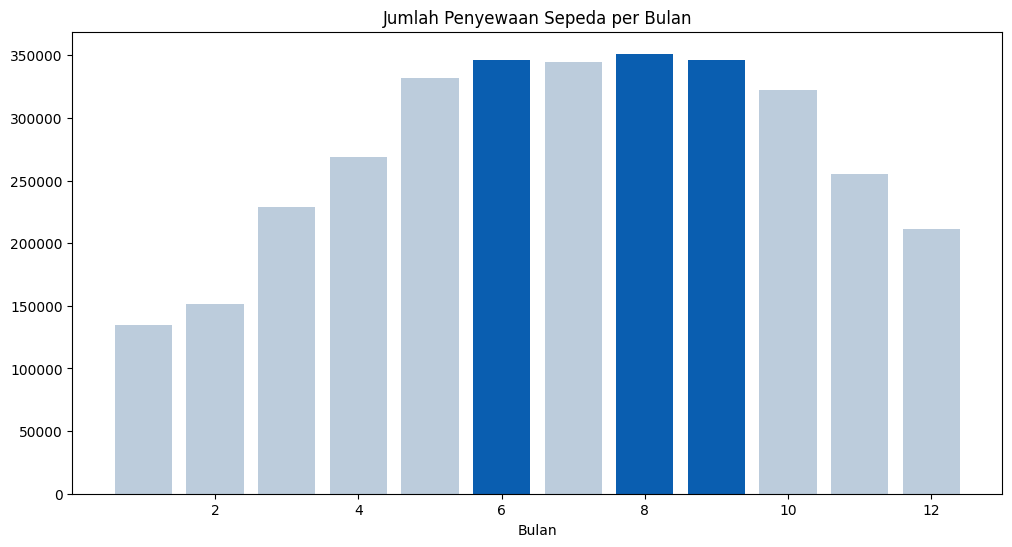

In [23]:
# Agregasi penyewaan secara bulanan
monthly_avg = hour_df.groupby(by="mnth").agg({
    "cnt": "sum"
})

# Ambil 3 bulan dengan jumlah penyewaan tertinggi
top_3_months = monthly_avg["cnt"].nlargest(3).index
colors = ["#0A5EB0" if i in top_3_months else "#BCCCDC" for i in monthly_avg.index]

plt.figure(figsize=(12, 6))
plt.bar(monthly_avg.index, monthly_avg["cnt"], color=colors)
plt.title("Jumlah Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.show()

**Insight:**
- Penyewaan sepeda tertinggi terjadi pada bulan Juni, Agustus, dan September. Kondisi ini didorong karena adanya libur musim panas. Perusahaan dapat meningkatkan pelayanan pada pertengahan tahun untuk memastikan kepuasan konsumen.
- Pada awal dan akhir tahun, penyewaan sepeda rendah dibandingkan bulan-bulan lainnya.

#### Perkembangan Penyewaan Sepeda Setiap Jam

Text(0.5, 1.0, 'Jumlah Penyewaan Sepeda per Jam')

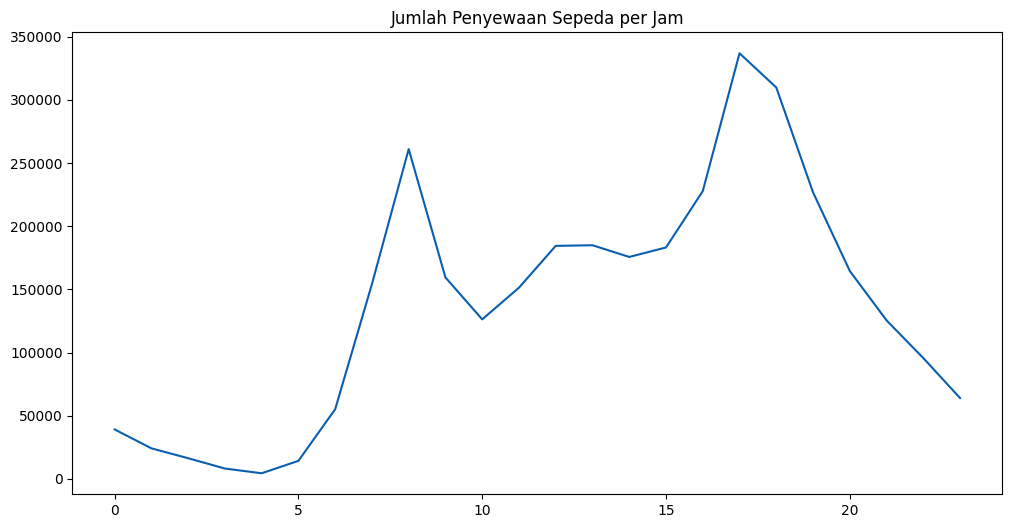

In [35]:
# Agregasi data per jam
hourly_avg = hour_df.groupby(by="hr").agg({
    "cnt": "sum"
})

# Plot data
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg["cnt"], color="#0A5EB0")
plt.title("Jumlah Penyewaan Sepeda per Jam")

**Insight:**
- Berdasarkan grafik di atas, penyewaan sepeda tertinggi terjadi pada jam berangkat dan pulang kantor, yaitu pukul 7-8 dan pukul 17-18.

#### **Kesimpulan**
- Penyewaan sepeda tertinggi terjadi pada pertengahan tahun, yaitu sekitar bulan Juni sampai September. Perusahaan dapat menambah jumlah sepeda pada bulan-bulan tersebut untuk meningkatkan kualitas layanan dan meningkatkan.
- Setiap harinya, penyewaan sepeda mencapai jumlah tertinggi pada jam berangkat dan pulang kerja. Perusahaan dapat memastikan ketersediaan sepeda pada jam-jam tersebut agar kepuasan pelanggan tetap terjaga.

#### Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca pada Hari Kerja/Libur

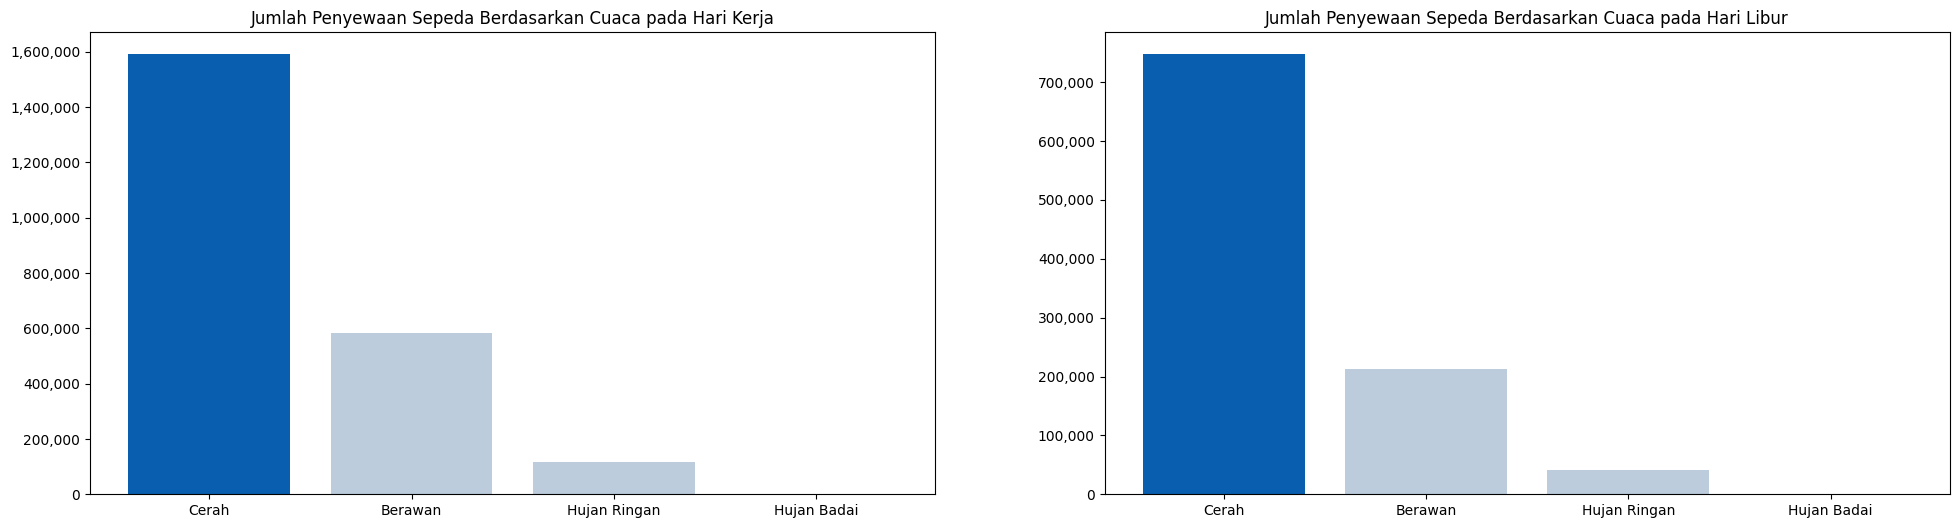

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

hour_workingday = hour_df[hour_df["workingday"] == 1]
sum_hour_workingday = hour_workingday.groupby(by="weathersit")["cnt"].sum()
colors = ["#0A5EB0" if val == sum_hour_workingday.max() else "#BCCCDC" for val in sum_hour_workingday.values]
ax[0].bar(sum_hour_workingday.index, sum_hour_workingday.values, tick_label=["Cerah", "Berawan", "Hujan Ringan", "Hujan Badai"], color=colors)
ax[0].set_title("Jumlah Penyewaan Sepeda Berdasarkan Cuaca pada Hari Kerja")
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:,.0f}".format(x)))

hour_nonworkingday = hour_df[hour_df["workingday"] == 0]
sum_hour_nonworkingday = hour_nonworkingday.groupby(by="weathersit")["cnt"].sum()
colors = ["#0A5EB0" if val == sum_hour_nonworkingday.max() else "#BCCCDC" for val in sum_hour_nonworkingday.values]
ax[1].bar(sum_hour_nonworkingday.index, sum_hour_nonworkingday.values, tick_label=["Cerah", "Berawan", "Hujan Ringan", "Hujan Badai"], color=colors)
ax[1].set_title("Jumlah Penyewaan Sepeda Berdasarkan Cuaca pada Hari Libur")
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:,.0f}".format(x)))

**Insight:**
- Baik pada hari kerja maupun hari libur, penyewaan sepeda paling banyak terjadi saat cuaca cerah. Hal ini dapat menjadi masukan bagi perusahaan untuk menyediakan jas hujan/sejenisnya saat cuaca hujan/salju agar jumlah pelanggan yang menyewa sepeda lebih banyak.

### Pertanyaan 2: Bagaimana hubungan kondisi cuaca terhadap tingkat penyewaan sepeda?

#### Plot Korelasi antara Suhu dengan Jumlah Penyewaan dan Kecepatan Angin dengan Jumlah Penyewaan

Text(0, 0.5, 'Jumlah Penyewaan Sepeda')

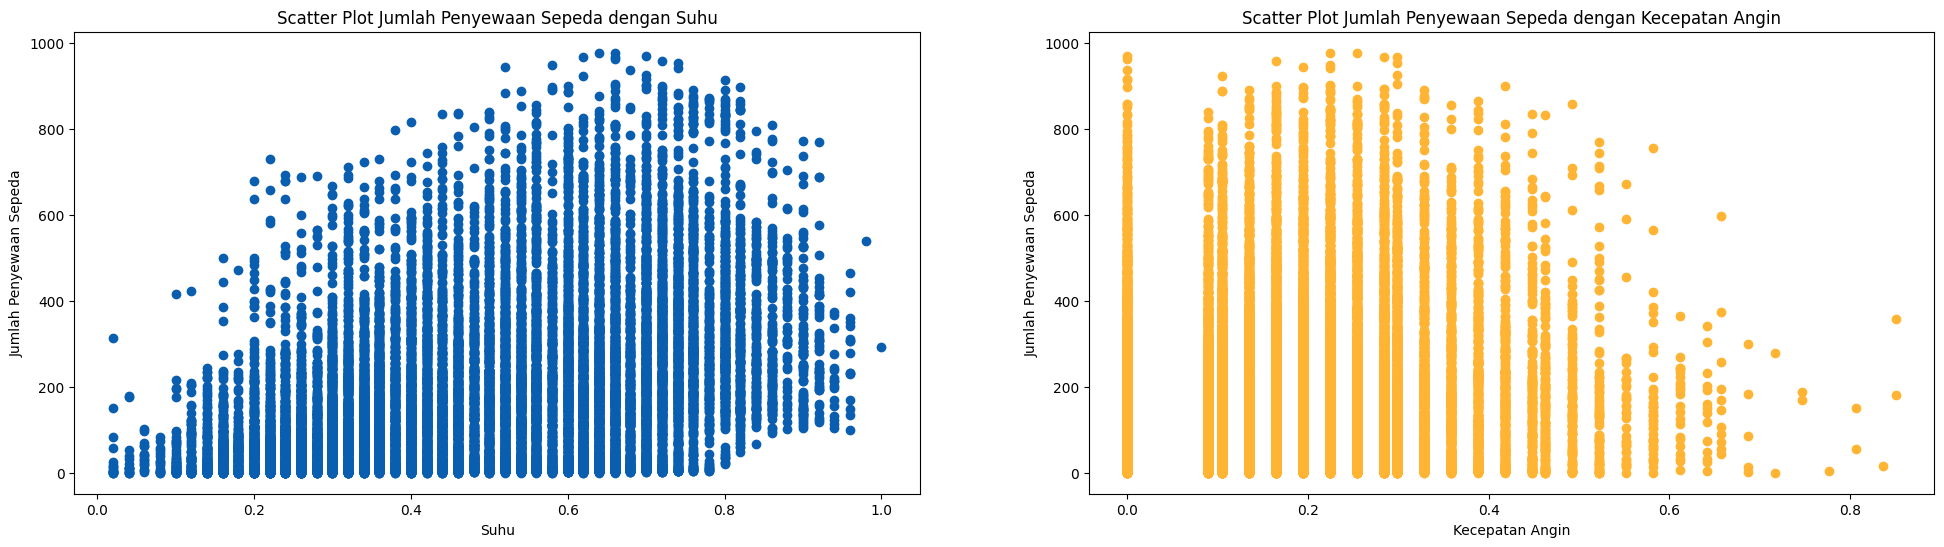

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

ax[0].scatter(hour_df["temp"], hour_df["cnt"], color="#0A5EB0")
ax[0].set_title("Scatter Plot Jumlah Penyewaan Sepeda dengan Suhu")
ax[0].set_xlabel("Suhu")
ax[0].set_ylabel("Jumlah Penyewaan Sepeda")

ax[1].scatter(hour_df["windspeed"], hour_df["cnt"], color="#FFB433")
ax[1].set_title("Scatter Plot Jumlah Penyewaan Sepeda dengan Kecepatan Angin")
ax[1].set_xlabel("Kecepatan Angin")
ax[1].set_ylabel("Jumlah Penyewaan Sepeda")

#### **Kesimpulan**
- Jumlah penyewaan sepeda dan suhu terlihat berhubungan secara positif. Hal ini ditandai ketika suhu makin tinggi, jumlah penyewaan sepeda juga semakin tinggi. Pelanggan akan menyewa sepeda ketika suhu panas dibandingkan suhu dingin.
- Jumlah penyewaan sepeda dan kecepatan angin terlihat memiliki hubungan negatif. Hal ini dilihat ketika semakin rendah kecepatan angin, jumlah penyewaan sepeda semakin tinggi. Perusahaan dapat memberikan potongan harga kepada pelanggan ketika kecepatan angin sedang rendah untuk menarik lebih banyak pelanggan.

### Pertanyaan 3: Bagaimana status keanggotaan pelanggan yang melakukan penyewaan sepeda?

#### Stacked Bar Chart Jumlah Penyewaan Sepeda Berdasarkan Status Keanggotaan Pelanggan

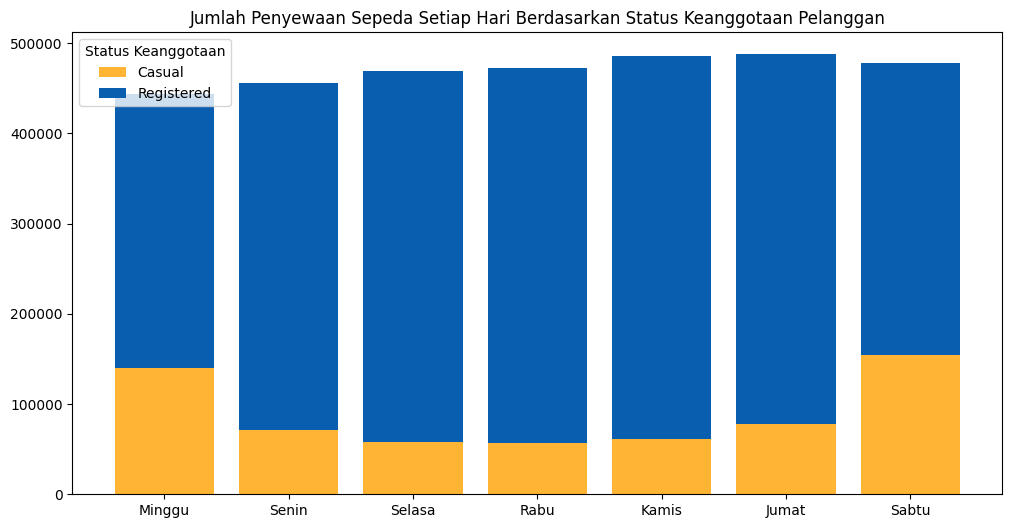

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

# Kelompokkan penyewaan berdasarkan hari dan status keanggotaan pelanggan
sum_hour_weekday = hour_df.groupby("weekday")[["casual", "registered"]].sum()

# Plot
ax.bar(sum_hour_weekday.index, sum_hour_weekday["casual"], label="Casual", color="#FFB433")
ax.bar(sum_hour_weekday.index, sum_hour_weekday["registered"], bottom=sum_hour_weekday["casual"], label="Registered", color="#0A5EB0")
ax.set_title("Jumlah Penyewaan Sepeda Setiap Hari Berdasarkan Status Keanggotaan Pelanggan")
ax.set_xticks(sum_hour_weekday.index, ["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"])
ax.legend(title="Status Keanggotaan", loc="upper left")

#### **Kesimpulan**
- Pelanggan yang sudah terdaftar menjadi anggota melakukan lebih banyak transaksi dibandingkan pengguna biasa. Oleh karena itu, perusahaan dapat menghadirkan promosi bagi pengguna yang terdaftar untuk menggaet lebih banyak pelanggan.

### Pertanyaan 4: Bagaimana tren penyewaan sepeda dalam dari 2011 hingga 2012?

#### Jumlah Penyewaan Sepeda Setiap Bulan

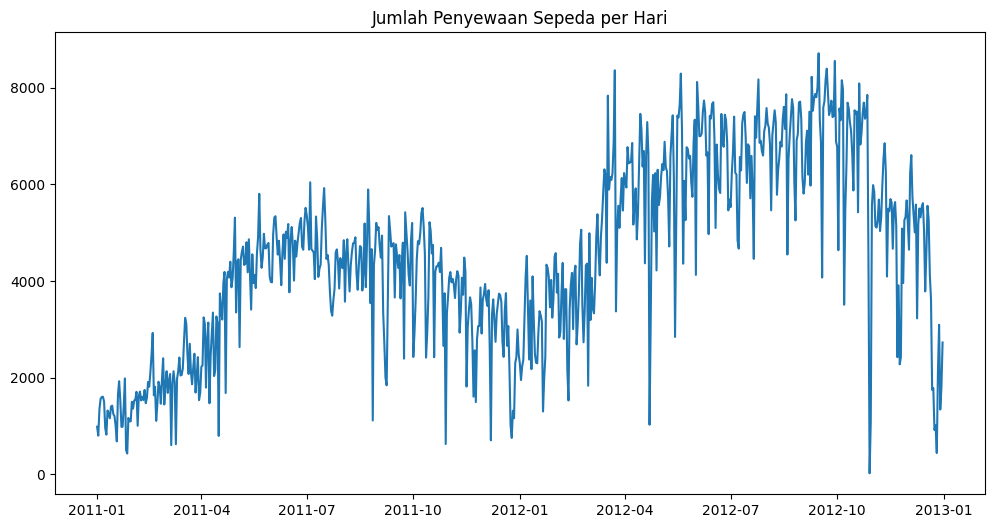

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(day_df["dteday"], day_df["cnt"])
plt.title("Jumlah Penyewaan Sepeda per Hari")
plt.show()

#### **Kesimpulan**
- Secara umum, penyewaan sepeda memiliki tren meningkat dari tahun 2011 hingga 2012.
- Akan tetapi, jumlah penyewaan sepeda selalu menyentuh titik tertinggi pada pertengahan tahun.
- Jumlah penyewaan sepeda selalu mengalami penurunan menjelang akhir tahun.
- Perusahaan dapat menambahkan fasilitas jas hujan atau sejenisnya agar pelanggan dapat menyewa sepeda pada akhir tahun dan memberikan diskon saat pertengahan tahun untuk menarik lebih banyak konsumen.

## Analisis Lanjutan Clustering

### Tujuan
- Menciptakan cluster tingkat penyewaan sepeda, tingkat suhu, dan tingkat kelembapan.
- Mengetahui performa tingkat penyewaan sepeda berdasarkan tingkat suhu dan kelembapan.

#### Menggunakan Teknik Binning untuk Membuat Cluster

In [29]:
# Membuat cluster suhu menjadi 3 kategori
temp_cluster = pd.cut(hour_df["temp"], [0, 0.33, 0.67, 1], labels=["Low", "Mid", "High"])

# Membuat cluster kelembapan menjadi 3 kategori
hum_cluster = pd.cut(hour_df["hum"], [0, 0.33, 0.67, 1], labels=["Low", "Mid", "High"])

# Membuat cluster jumlah penyewaan menjadi 2 kategori
temp_cnt = pd.cut(hour_df["cnt"], [0, hour_df["cnt"].mean(), hour_df["cnt"].max()], labels=["Low", "High"])

cluster_df = pd.concat([temp_cluster, hum_cluster, temp_cnt], axis=1)
cluster_df.columns = ["temperature", "humidity", "rent"]
cluster_df.head()


,temperature,humidity,rent
0,Low,High,Low
1,Low,High,Low
2,Low,High,Low
3,Low,High,Low
4,Low,High,Low


#### Pie chart tingkat penyewaan sepeda

Text(0.5, 1.0, 'Tingkat Penyewaan Sepeda')

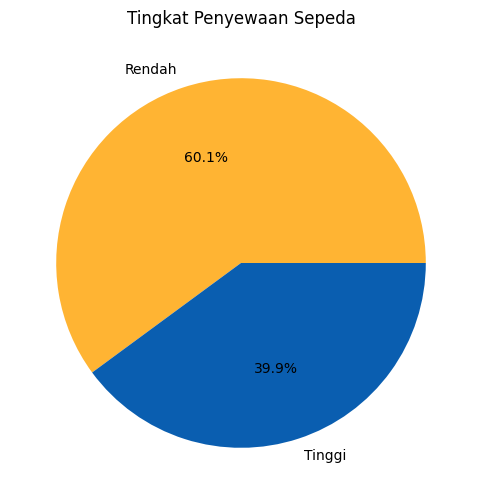

In [30]:
plt.figure(figsize=(12, 6))
plt.pie(cluster_df["rent"].value_counts(), labels=["Rendah", "Tinggi"], autopct="%1.1f%%", colors=["#FFB433", "#0A5EB0"])
plt.title("Tingkat Penyewaan Sepeda")

**Insight:**
- Berdasarkan cluster yang dibuat, tingkat penyewaan sepeda dari tahun 2011 hingga 2012 sebagian besar termasuk kategori low atau di bawah rata-rata. Hal ini menjadi masukan bagi perusahaan untuk dapat mengambil kebijakan agar dapat menarik lebih banyak pelanggan.

#### Stacked bar chart tingkat penyewaan sepeda berdasarkan cluster suhu

C:\Users\hp14s\AppData\Local\Temp\ipykernel_12892\1129442351.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rent_temp = cluster_df.groupby("temperature")["rent"].value_counts().unstack()


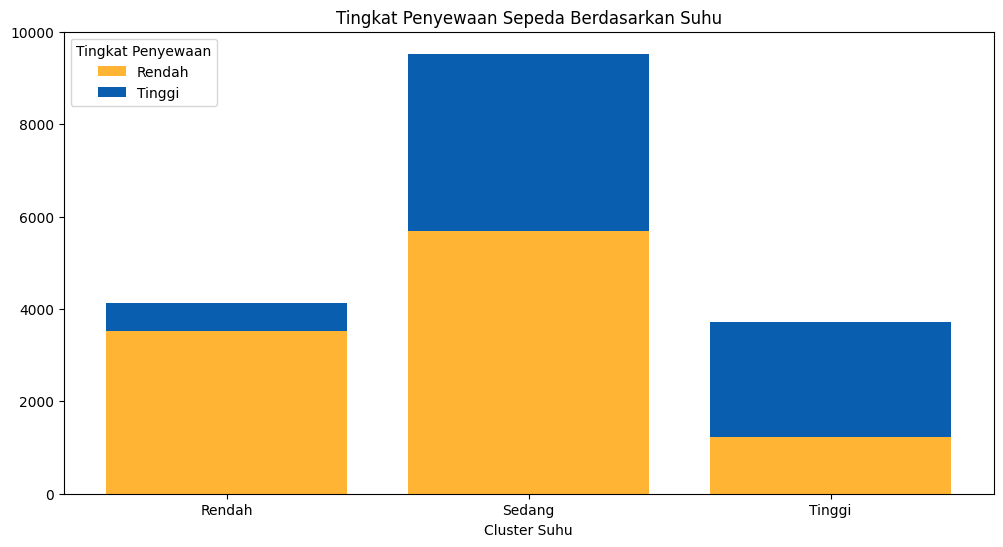

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))

# Kelompokkan tingkat penyewaan berdasarkan suhu
rent_temp = cluster_df.groupby("temperature")["rent"].value_counts().unstack()

# Plot
ax.bar(rent_temp.index, rent_temp["Low"], label="Rendah", color="#FFB433")
ax.bar(rent_temp.index, rent_temp["High"], bottom=rent_temp["Low"], label="Tinggi", color="#0A5EB0")
ax.set_title("Tingkat Penyewaan Sepeda Berdasarkan Suhu")
ax.set_xticks(rent_temp["Low"].index, ["Rendah", "Sedang", "Tinggi"])
ax.set_xlabel("Cluster Suhu")
ax.legend(title="Tingkat Penyewaan", loc="upper left")

**Insight:**
- Pada suhu rendah dan sedang, tingkat penyewaan sepeda sering berada pada kategori rendah. Hal ini menunjukkan pelanggan jarang menyewa sepeda saat suhu dingin.
- Pada suhu tinggi, tingkat penyewaan sepeda sering berada pada kategori tinggi. Hal ini menunjukkan pelanggan sering menyewa sepeda saat suhu panas.

#### Stacked bar chart tingkat penyewaan sepeda berdasarkan cluster kelembapan

C:\Users\hp14s\AppData\Local\Temp\ipykernel_12892\2608881832.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rent_hum = cluster_df.groupby("humidity")["rent"].value_counts().unstack()


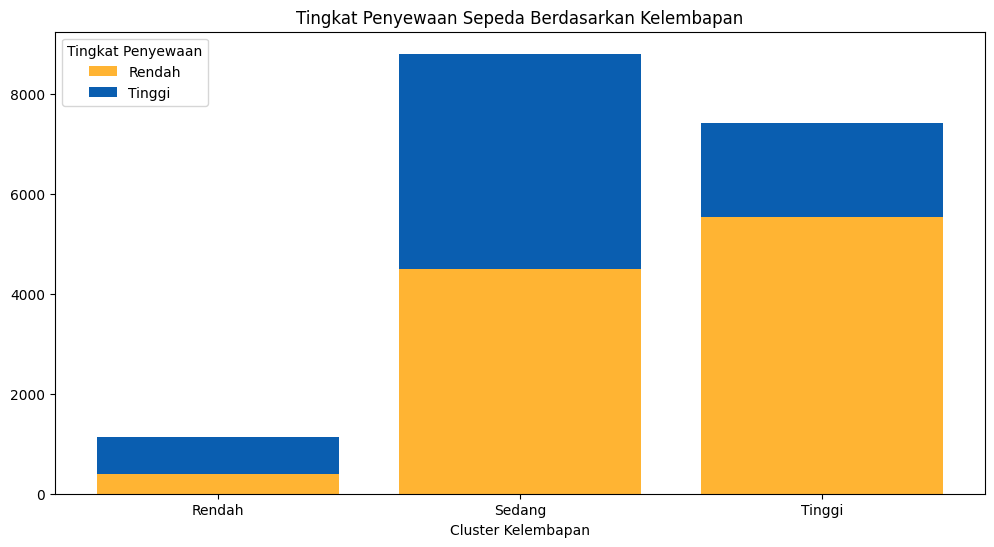

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

# Kelompokkan tingkat penyewaan berdasarkan kelembapan
rent_hum = cluster_df.groupby("humidity")["rent"].value_counts().unstack()

# Plot
ax.bar(rent_hum.index, rent_hum["Low"], label="Rendah", color="#FFB433")
ax.bar(rent_hum.index, rent_hum["High"], bottom=rent_hum["Low"], label="Tinggi", color="#0A5EB0")
ax.set_title("Tingkat Penyewaan Sepeda Berdasarkan Kelembapan")
ax.set_xticks(rent_hum["Low"].index, ["Rendah", "Sedang", "Tinggi"])
ax.set_xlabel("Cluster Kelembapan")
ax.legend(title="Tingkat Penyewaan", loc="upper left")

**Insight:**
- Saat kelembapan tinggi, tingkat penyewaan sepeda cenderung rendah.
- Saat kelembapan rendah dan sedang, pelanggan banyak yang menyewa sepeda.
- Oleh karena itu, perusahaan dapat mempertimbangkan kelembapan udara untuk menentukan strategi usaha.

## Conclusion

Berdasarkan analisis yang dilakukan terhadap Bike Sharing Dataset, kesimpulan yang dapat ditarik adalah sebagai berikut.

- Pelanggan paling banyak menyewa sepeda pada pertengahan tahun, yaitu pada bulan Juni sampai September. Secara harian, penyewaan sepeda tertinggi terjadi pada jam-jam berangkat dan pulang kantor. Selain itu, penyewaan sepeda pada hari kerja lebih tinggi dibandingkan pada hari libur.
- Suhu memiliki hubungan positif dengan jumlah penyewaan sepeda, artinya semakin panas cuaca pada saat tertentu, semakin tinggi penyewaan sepeda oleh pelanggan. Sementara itu, kecepatan angin memiliki hubungan negatif dengan jumlah penyewaan sepeda, artinya semakin kencang angin pada saat tertentu, semakin rendah penyewaan sepeda oleh pelanggan.
- Pelanggan yang sudah terdaftar paling banyak melakukan penyewaan sepeda setiap harinya dibandingkan pelanggan yang belum terdaftar. Hal ini menjadi peluang bagi perusahaan untuk memberikan beberapa keuntungan bagi pelanggan yang terdaftar untuk menarik lebih banyak pelanggan.
- Selama tahun 2011 hingga 2012, penyewaan sepeda memiliki tren meningkat. Hal ini menunjukkan bahwa jumlah pelanggan yang menyewa sepeda bertambah secara rata-rata. Akan tetapi, penyewaan sepeda mengalami penurunan menjelang akhir tahun. Kondisi ini harus diatasi oleh perusahaan agar dapat mempertahankan kepuasan pelanggan.

In [34]:
hour_df.to_csv("hour.csv", index=False)